In [1]:
# Import libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Questions

### What's the data?

The data that I sampled to update the posterior is the likelihood. 

I specify a "true" probability for A, B, and C and creating a binomial distribution for each at the start of the simulation to simulate us actually "playing" the game.

And after deciding on which game to play, I "play it" once by obtaining a random sample of the chosen binomial distribution. 

The outcome of this binomial random sample now becomes my data and I use this data to update my belief of the distribution of the parameter value (theta).

### What's the update for the posterior in question?

The update for the posterior is the alpha and beta values of the beta distributions. 

After deciding on which bandit (A, B, or C) to play with using the sampled data from the beta distributions, we play that bandit once and obtain the liklihood outcome (or the data explained in the previous question)

This is 1 sample of the outcome of a binomial random sample (so it is either 0 or 1)

Then we use this information, where n = 1 and x = outcome of the binomial random sample, to update the chosen beta distribution through the calculation:

    new_alpha = likelihood_outcome + original_alpha

    new_beta = n - likelihood_outcome + original_beta  (Where n = 1 since we sample from likelihood once)

### Which one of the three choices will you try out? How will you choose?

I choose the game to play by sampling a random variable for all 3 priors. 

Initially, the prior (beta) distributions are initialized as an uniform distribution (Beta Distrbution with alpha=beta=1 is equivalent to an uniform distribution.)

As we sample more and update each beta posterior more, I found out that the higher true value tends to get updated more. (As you can see from the previous question)

The thought is that once we obtain more data by playing more games, our "belief", or prior distributions, will eventually reach some agreement on which game is the best to play and it will play that game more often than others. 

In my first simulation (where pA=0.3, pB=0.5, pC=0.7), we do see this effect as the visualized posterior distributions show that the peak for posterior C is around the true value 0.7 (the black vertical line) and from the outcome choices scatter plot, we see that near the end of the simulation, we were mostly choosing to play game C instead of game A and B. 



In [2]:
# # Import libraries
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# Set seed
np.random.seed(seed=130)

n = 1
parameter_domain = np.linspace(0,1,1001)

def run_simulation(pA=0.3, pB=0.5, pC=0.7, iterations=1000):
    # Define distributions
    # Instantiate them as uniform
    A = stats.beta(a=1, b=1)
    B = stats.beta(a=1, b=1)
    C = stats.beta(a=1, b=1)

    # This dictionary holds all the alpha beta values for each A, B, C distributions. 
    # It is used and accessed when we update these distributions and form a new posterior
    betas = {
        "A": [1, 1, A], 
        "B": [1, 1, B], 
        "C": [1, 1, C], 
    }

    # pA, pB, pC = 0.3, 0.5, 0.7

    likelihoods = {
        "A": stats.binom(n=1,p=pA),
        "B": stats.binom(n=1,p=pB),
        "C": stats.binom(n=1,p=pC)
    }

    # Record data
    # array to store the coinflip outcome. 
    # 0 for A, 1 for B, 2 for C
    # The sum of the values essentially means how many times each beta distribution is updated
    coinflip_outcome = []

    for i in range(iterations):
        # Perform coinflip simulation to choose the next beta to update
        # print(A.rvs(), B.rvs(), C.rvs())

        A_coin = betas["A"][2].rvs(size=1).item()
        B_coin = betas["B"][2].rvs(size=1).item()
        C_coin = betas["C"][2].rvs(size=1).item()
        # print("Coin flip outcome: ", str(A_coin), str(B_coin), str(C_coin))

        if A_coin > B_coin and A_coin > C_coin:
            # A wins coin flip, so we update A
            beta_chosen = "A"
            coinflip_outcome.append("A")
        elif B_coin > A_coin and B_coin > C_coin:
            # B wins coin flip, so we update B
            beta_chosen = "B"
            coinflip_outcome.append("B")
        else:
            # C wins coin flip, so we update C
            beta_chosen = "C"
            coinflip_outcome.append("C")
        likelihood_outcome = likelihoods[beta_chosen].rvs(size=n).item()
        # At this point, n = 1, and x = liklelihood_outcome
        # Then we update the alpha beta values based on the likelihood_outcome and obtain a new posterior
        betas[beta_chosen][0] = likelihood_outcome + betas[beta_chosen][0]
        betas[beta_chosen][1] = n - likelihood_outcome + betas[beta_chosen][1]
        betas[beta_chosen][2] = stats.beta(a=betas[beta_chosen][0], b=betas[beta_chosen][1])

    return betas, coinflip_outcome
    

In [3]:
# Function to plot the posterior distributions
def plot_posterior(betas, pA=None, pB=None, pC=None):
    posterior_A = betas["A"][2].pdf(parameter_domain)
    posterior_B = betas["B"][2].pdf(parameter_domain)
    posterior_C = betas["C"][2].pdf(parameter_domain)

    plt.figure(figsize=(12,4))
    plt.plot(parameter_domain, posterior_A, label="posterior_A")
    plt.plot(parameter_domain, posterior_B, label="posterior_B")
    plt.plot(parameter_domain, posterior_C, label="posterior_C")
    
    if pA and pB and pC:
        plt.axvline(x = pA, color = 'black', label = 'pA='+str(pA))
        plt.axvline(x = pB, color = 'black', label = 'pB='+str(pB))
        plt.axvline(x = pC, color = 'black', label = 'pC='+str(pC))

    plt.legend()
    plt.xlabel("Iteration number")
    plt.ylabel("Chosen Game")
    plt.title("Visualize Posterior distribution of A, B, and C. (Black line indicates their true value)")

# function to plot the coinflip outcome
def plot_coinflip(coinflip_outcome):
    plt.figure(figsize=(12,4))
    plt.plot(range(1000), coinflip_outcome, 'o')
    plt.title("Visualize the distributions we decide on.")
    plt.xlabel("Iteration number")
    plt.ylabel("Chosen Game")
    # plt.yticks([0, 1, 2], ["A", "B", "C"])

# Simulation #1

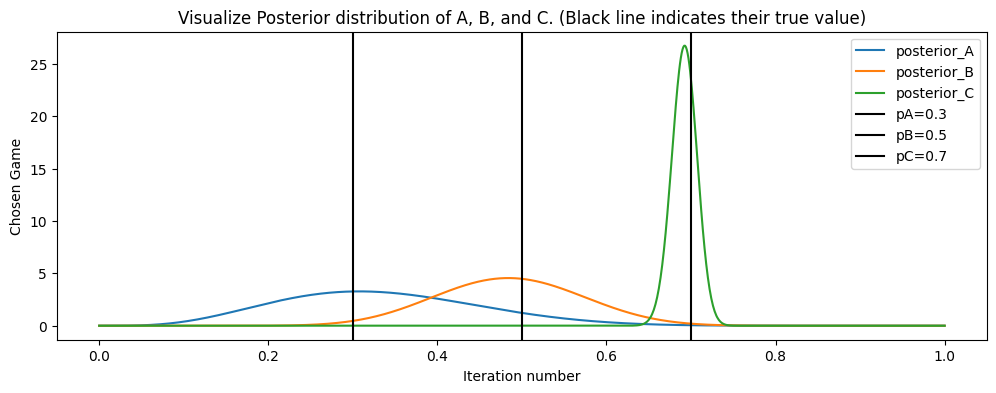

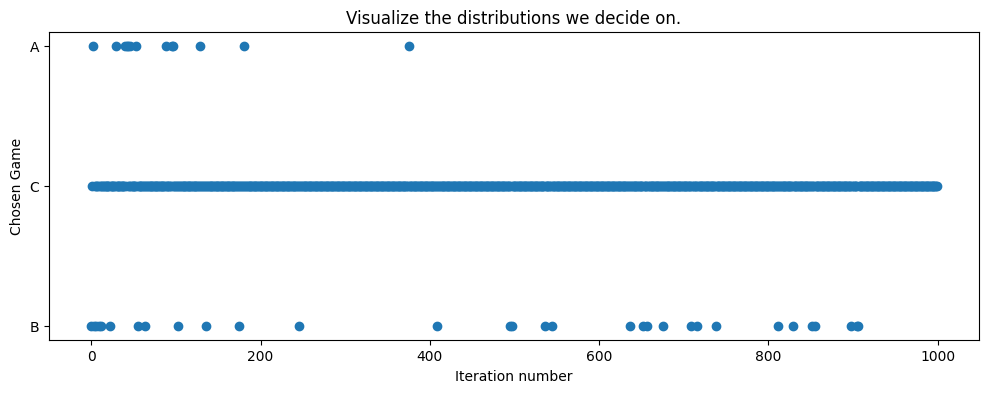

In [4]:
# Try out 0.3, 0.5, 0.7 p values for A, B, C respectively
pA = 0.3
pB = 0.5
pC = 0.7
betas, coinflip_outcome = run_simulation(pA=pA, pB=pB, pC=pC)
plot_posterior(betas, pA=pA, pB=pB, pC=pC)
plot_coinflip(coinflip_outcome)

## Simulation #1 Observations

For this simulation, I set the true value of pA = 0.3, pB = 0.5, pC = 0.7

From the scatter plot, we can see that initially, game A and B are sometimes being chosen. but game C has clearly been chosen the most times throughout the entire simulation. 

We can also see from the posterior that posterior C is closely resembles its true value after we have played it multiple times, and the distribution suggests that most of the times the value obtained from sampling posterior C , it will be a greater probability than posterior A and B, which is also true based on the true values we have set initially.

As a conclusion, we see that in the end, game C is chosen more often and the posterior suggests that C has a higher true probability than game A and B. So we will choose game C as our final answer. 

This is correct since pC is the highest and choosing to play game C will yield the best outcome. 

# Simulation #2

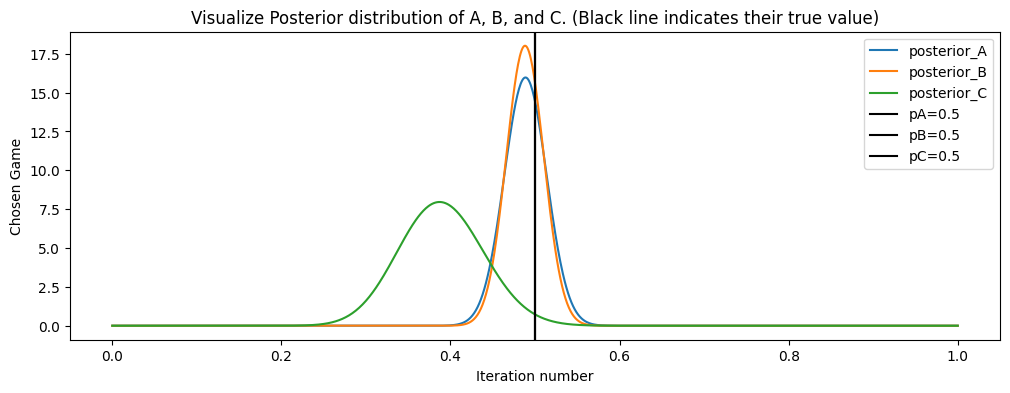

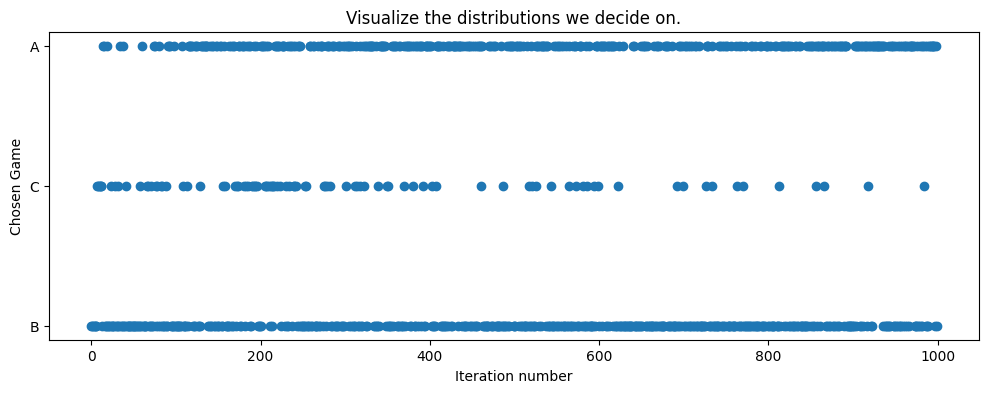

In [5]:
# Try out all equal pvalues 
pA = 0.5
pB = 0.5
pC = 0.5
betas, coinflip_outcome = run_simulation(pA=pA, pB=pB, pC=pC)
plot_posterior(betas, pA=pA, pB=pB, pC=pC)
plot_coinflip(coinflip_outcome)

## Simulation #2 Observations:

In this simulation, I set all pA, pB, pC = 0.5 to measure how will the simulation behave if all 3 games are equal. 

From the scatter plot, we can see that we play both A and B nearly equal amount of times, and the posterior for A and B nearly resembles each other. This suggests that the posterior is believes that game A and B are similar. 

However, we played less C, and I believe this is just because of random errors or the random seed that made game C fail more times when it is sampled, so it gradually updated to a lower probability than its true value, which further impacted the amount of times it is played in the future by having less chance to be chosen since A and B have already been updated . 

I think this is a phenomenon showing that I can do better at balancing exploration versus exploitation since with the same true probability, I believe if we give C more tries, it will eventually become similar to posterior A and B. 

But I suppose in terms of playing the game and determining which game is the best to play here, it doesn't really matter if C doesn't get picked on often since the true probability of all 3 games are the same, so even if we reach the conclusion that either A or B is the best game to play, we would still be correct in this context and yield the optimal outcome. 